In [1]:

import pandas as pd #  for data manipulation
import seaborn as sns #  for data visualization
import matplotlib.pyplot as plt #  for plotting graphs
from sklearn.model_selection import train_test_split#train_test_split to split data into training and testing sets
from sklearn.linear_model import LinearRegression # Importing LinearRegression model from sklearn
from sklearn.linear_model import Lasso # Importing Lasso regression model from sklearn
from sklearn import metrics # Importing metrics module from sklearn for performance evaluation


In [3]:
df = pd.read_csv('car.csv') # Load the dataset

In [4]:
df.head() # Display the first few rows of the dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df.shape # Display the shape of the dataset

(8128, 12)

In [ ]:
df_info = df.info() # Display information about the dataset, including data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
df.describe(include='all') # Display descriptive statistics for all columns in the dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7913,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,320,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,NaN,5.000000


In [ ]:
df.isnull().sum() # Check for missing values in each column

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [ ]:
# Fill numerical columns with median
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

# Handle 'max_power' (object column) — optional: convert to numeric first
# If not numeric, extract number and fill
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'].fillna(df['max_power'].median(), inplace=True)



/tmp/ipython-input-34-2338906980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median(), inplace=True)
/tmp/ipython-input-34-2338906980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
#checking value type in data set
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())


fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


In [ ]:
#encoding data
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

/tmp/ipython-input-36-3403304854.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
/tmp/ipython-input-36-3403304854.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
/tmp/ipython-input-36-3403304854.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0


In [ ]:
X = df.drop(['name','selling_price'],axis=1) # Features: all columns except 'name' and 'selling_price'
Y = df['selling_price'] # Target variable: 'selling_price'
# Splitting the dataset into training and testing sets

In [ ]:
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,1,0,0,0,18.50,1197.0,82.85,5.0
8124,2007,119000,0,0,0,3,16.80,1493.0,110.00,5.0
8125,2009,120000,0,0,0,0,19.30,1248.0,73.90,5.0
8126,2013,25000,0,0,0,0,23.57,1396.0,70.00,5.0


from matplotlib import pyplot as plt
X['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['km_driven'].plot(kind='hist', bins=20, title='km_driven')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['fuel'].plot(kind='hist', bins=20, title='fuel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['seller_type'].plot(kind='hist', bins=20, title='seller_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='year', y='km_driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='km_driven', y='fuel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='fuel', y='seller_type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='seller_type', y='transmission', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['km_driven']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('km_driven')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['fuel']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('fuel')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['seller_type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('seller_type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['transmission']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('transmission')

from matplotlib import pyplot as plt
X['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['km_driven'].plot(kind='line', figsize=(8, 4), title='km_driven')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['fuel'].plot(kind='line', figsize=(8, 4), title='fuel')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['seller_type'].plot(kind='line', figsize=(8, 4), title='seller_type')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Y # Target variable: 'selling_price'

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.1,random_state=3) # Split the data into training and testing sets with 10% of the data for testing

In [ ]:
lin_model= LinearRegression() # Create an instance of the LinearRegression model

In [ ]:
print(X_train.isnull().sum()) # Check for missing values in the training features
print(Y_train.isnull().sum()) # Check for missing values in the training target variable

year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64
0


In [ ]:
lin_model.fit(X_train,Y_train) # Fit the Linear Regression model to the training data

LinearRegression()

In [ ]:
traning = lin_model.predict(X_train) # Make predictions on the training set

In [ ]:
error = metrics.r2_score(Y_train,traning) # Calculate the R-squared error for the training set predictions
print('R squared error:',error) 

R squared error: 0.6679854335460585


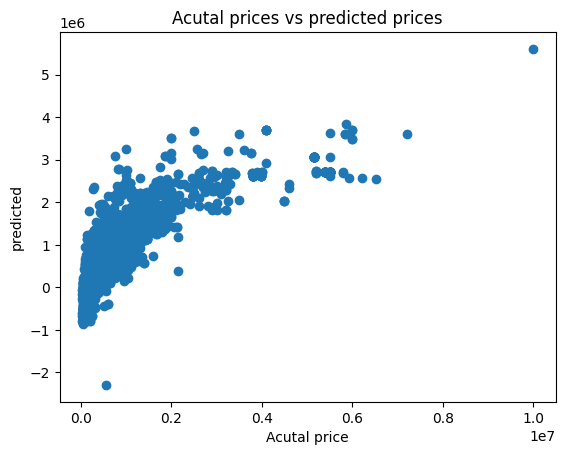

In [ ]:
plt.scatter(Y_train,traning) # Scatter plot of actual vs predicted prices for training set
plt.xlabel("Acutal price")
plt.ylabel("predicted")
plt.title("Acutal prices vs predicted prices")
plt.show()

In [ ]:
test_data=lin_model.predict(X_test) # Make predictions on the test set

In [ ]:
error_score = metrics.r2_score(Y_test,test_data) # Calculate the R-squared error for the test set predictions
print('R squared error:',error_score)

R squared error: 0.6921438537715525


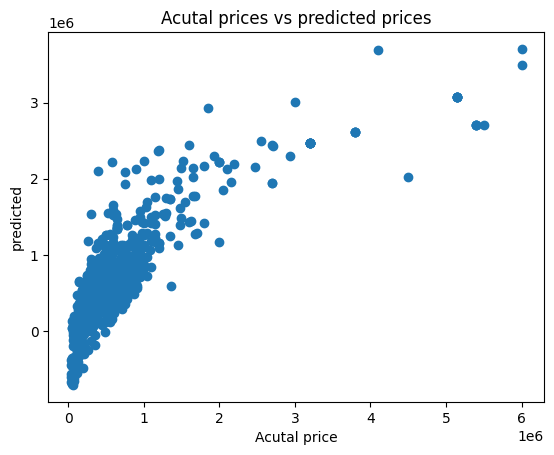

In [ ]:
plt.scatter(Y_test,test_data) # Scatter plot of actual vs predicted prices for test set
plt.xlabel("Acutal price")
plt.ylabel("predicted")
plt.title("Acutal prices vs predicted prices")
plt.show()

lasso


In [ ]:
Lasso_model= Lasso() # Create an instance of the Lasso regression model

In [ ]:
print(X_train.isnull().sum()) # Check for missing values in the training features
print(Y_train.isnull().sum())

year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64
0


In [ ]:
Lasso_model.fit(X_train,Y_train) # Fit the Lasso regression model to the training data

Lasso()

In [ ]:
traning = Lasso_model.predict(X_train) # Make predictions on the training set

In [ ]:
error = metrics.r2_score(Y_train,traning) # Calculate the R-squared error for the training set predictions
print('R squared error:',error)

R squared error: 0.6679854335051364


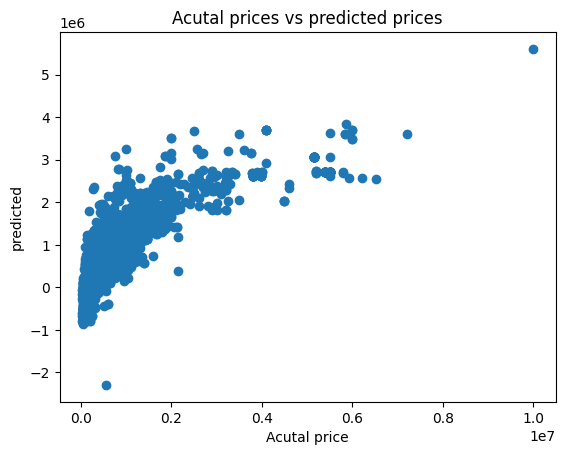

In [ ]:
plt.scatter(Y_train,traning) # Scatter plot of actual vs predicted prices for training set
plt.xlabel("Acutal price")
plt.ylabel("predicted")
plt.title("Acutal prices vs predicted prices")
plt.show()

In [ ]:
test_data=Lasso_model.predict(X_test)# Make predictions on the test set

In [ ]:
error_score = metrics.r2_score(Y_test,test_data) # Calculate the R-squared error for the test set predictions
print('R squared error:',error_score)

R squared error: 0.6921438537715525


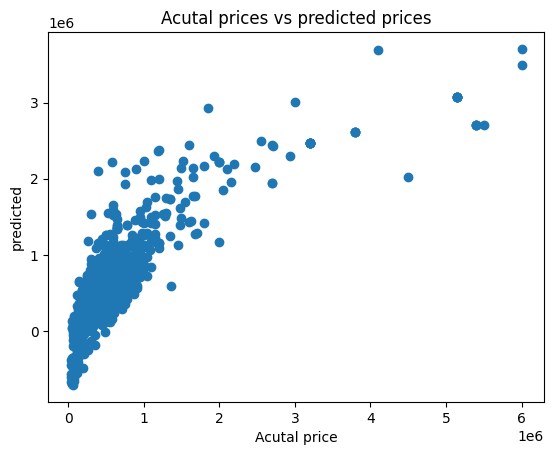

In [ ]:
plt.scatter(Y_test,test_data) # Scatter plot of actual vs predicted prices for test set
plt.xlabel("Acutal price")
plt.ylabel("predicted")
plt.title("Acutal prices vs predicted prices")
plt.show()

In [ ]:
import pickle # Save the trained model to a file using pickle


In [ ]:
pickle.dump(Lasso_model,open('car.pkl','wb')) # Save the Lasso model to a file named 'car.pkl' in write-binary mode